<a href="https://colab.research.google.com/github/ashishkumar1232/Machine_learning_projects/blob/main/car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [4]:
car_price=pd.read_csv('/content/car data.csv')

In [5]:
car_price.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
car_price.shape

(301, 9)

In [7]:
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
car_price.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
car_price.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [10]:
car_price.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [14]:
car_price['Owner'].value_counts()

,count
Owner,
0,290
1,10
3,1


In [15]:
car_price.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
car_price.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
car_price.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

<ipython-input-15-03318dd97c61>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_price.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
<ipython-input-15-03318dd97c61>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_price.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
<ipython-input-15-03318dd97c61>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. T

In [16]:
car_price.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [17]:
sns.set()

<ipython-input-18-69be6d75d791>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=car_price['Selling_Price'])


<Axes: ylabel='Density'>

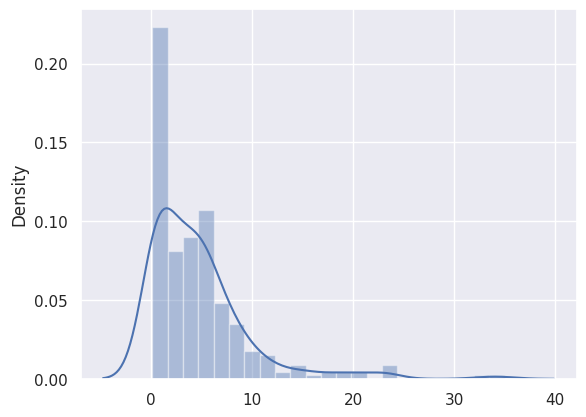

In [18]:
sns.distplot(x=car_price['Selling_Price'])

In [20]:
x=car_price.drop(columns=['Car_Name','Selling_Price'],axis=1)
y=car_price['Selling_Price']

In [21]:
x,y

(     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
 0    2014           5.59       27000          0            0             0   
 1    2013           9.54       43000          1            0             0   
 2    2017           9.85        6900          0            0             0   
 3    2011           4.15        5200          0            0             0   
 4    2014           6.87       42450          1            0             0   
 ..    ...            ...         ...        ...          ...           ...   
 296  2016          11.60       33988          1            0             0   
 297  2015           5.90       60000          0            0             0   
 298  2009          11.00       87934          0            0             0   
 299  2017          12.50        9000          1            0             0   
 300  2016           5.90        5464          0            0             0   
 
      Owner  
 0        0  
 1        0  
 2      

In [23]:
# splitting the data into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [24]:
print(x.shape,x_train.shape,x_test.shape)

(301, 7) (240, 7) (61, 7)


In [25]:
# Model training with linear regression
lr=LinearRegression()

In [26]:
lr.fit(x_train,y_train)

LinearRegression()

In [28]:
# Predicting from the model
x_train_pred=lr.predict(x_train)
error_score=metrics.r2_score(y_train,x_train_pred)
print(error_score)

0.8838169193709796


Text(0.5, 1.0, 'Actual vs Predicted Data')

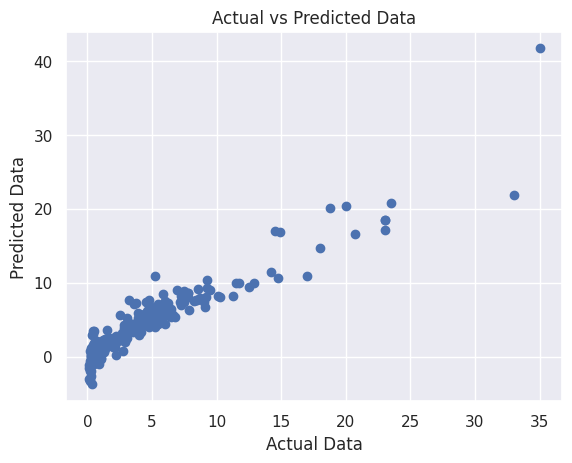

In [29]:
plt.scatter(y_train,x_train_pred)
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.title('Actual vs Predicted Data')


In [30]:
# prediction on test data
x_test_pred=lr.predict(x_test)
error_score_test=metrics.r2_score(y_test,x_test_pred)
print(error_score_test)

0.8401532365377697


Text(0.5, 1.0, 'Actual vs Predicted Data')

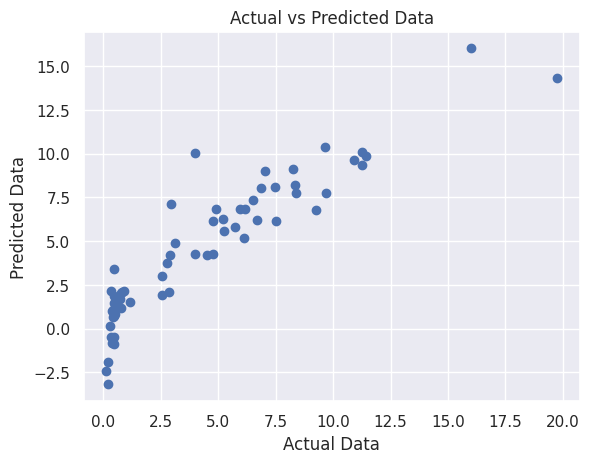

In [31]:
plt.scatter(y_test,x_test_pred)
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.title('Actual vs Predicted Data')

Lasso Regression

In [32]:
lass_reg=Lasso()

In [33]:
lass_reg.fit(x_train,y_train)

Lasso()

In [36]:
# Predictingon the training data
x_train_pred=lass_reg.predict(x_train)
error_score1=metrics.r2_score(y_train,x_train_pred)
print(error_score1)

0.843587395258283


Text(0.5, 1.0, 'Actual Data VS Predicted Data ')

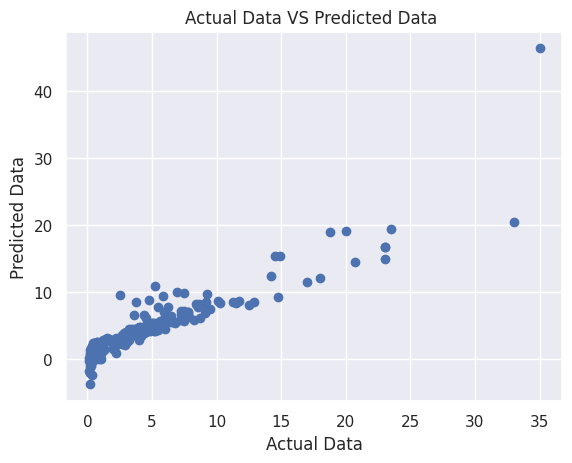

In [37]:
# Visualizing
plt.scatter(y_train,x_train_pred)
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.title('Actual Data VS Predicted Data ')

In [38]:
# prediction on the test data
x_test_pred=lass_reg.predict(x_test)
error_score2=metrics.r2_score(y_test,x_test_pred)
print(error_score2)

0.8497457570738539


Text(0.5, 1.0, 'Actual Data VS Predicted Data ')

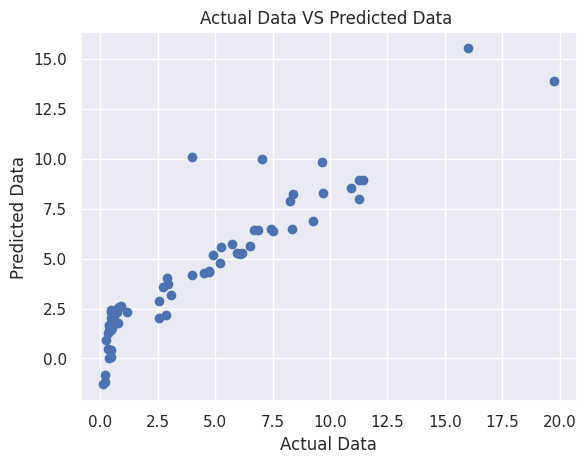

In [39]:
# Visualization
plt.scatter(y_test,x_test_pred)
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.title('Actual Data VS Predicted Data ')

In [41]:
# Making a predictive model
input=(2019,5.59,27000,0,0,0,0)
input_as_numpy=np.asarray(input)
input_reshaped=input_as_numpy.reshape(1,-1)
prediction=lass_reg.predict(input_reshaped)
print(prediction)

[5.53769047]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
